# CLASSWORK 3 

# TERM FREQUENCY

The term frequency of a word in a document indicates how often that word appears in the document relative to the total number of words in the document.

## IMPORTING PANDAS PACKAGE AND READING FILE

In [3]:
# Importing pandas as pd

import pandas as pd
file = "un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


## IMPORTING NLTK AND DOWNLOADING STOPWORDS

In [4]:
# Import the NLTK library

import nltk 
nltk.download('stopwords')

# Retrieve the set of English stopwords from NLTK's corpus

stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'which', 'weren', 'she', 'i', 'him', "hadn't", 'he', 'needn', 'down', 'they', "hasn't", "weren't", 'by', 'mustn', 'being', 'out', "didn't", 'theirs', 'until', 'to', 'same', 'hasn', 'his', 'itself', 'hers', "you've", 'd', 'shan', 'very', 'while', 'their', 'its', 'at', 'didn', 'such', 'them', 'ourselves', 'yours', 'did', 'here', 'does', "mightn't", "shan't", 'm', "she's", 'so', 'was', 'under', "you're", 'through', 'each', 'wasn', 'been', "doesn't", 'yourselves', 'once', "couldn't", 'only', 'now', "isn't", 'y', 'against', 't', 'this', 'had', 'own', 'ain', 'her', 'your', 'above', 'and', 'after', 're', 'has', 's', 'wouldn', 'ours', "won't", 'himself', 'than', 'these', "aren't", 'further', 'other', 'both', 'any', "should've", "shouldn't", 'why', 'am', 'me', 'my', 'up', 'having', 'a', 'all', 'with', 'in', 'most', "wasn't", 'there', 'then', 'whom', 'into', 'off', "wouldn't", 'the', 'doing', 'below', 'couldn', 'will', "haven't", 'be', 'over', 'those', 'themselves', 'for', 'because', 'from', 'a

[nltk_data] Downloading package stopwords to /Users/sid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## USING REGEX FOR TOKENIZATION AND STOPWORDS

In [5]:
# Import the 'regex' module as 're'

import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Pipeline of text processing functions
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

## COLLECTION PACKAGE

In [6]:
# Import the Counter class from the collections module

from collections import Counter
counter = Counter()

# Update the counter with tokens from each row in the 'tokens' column of the DataFrame

df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

# Sort the DataFrame by frequency in descending order

freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


## WORDCLOUDS

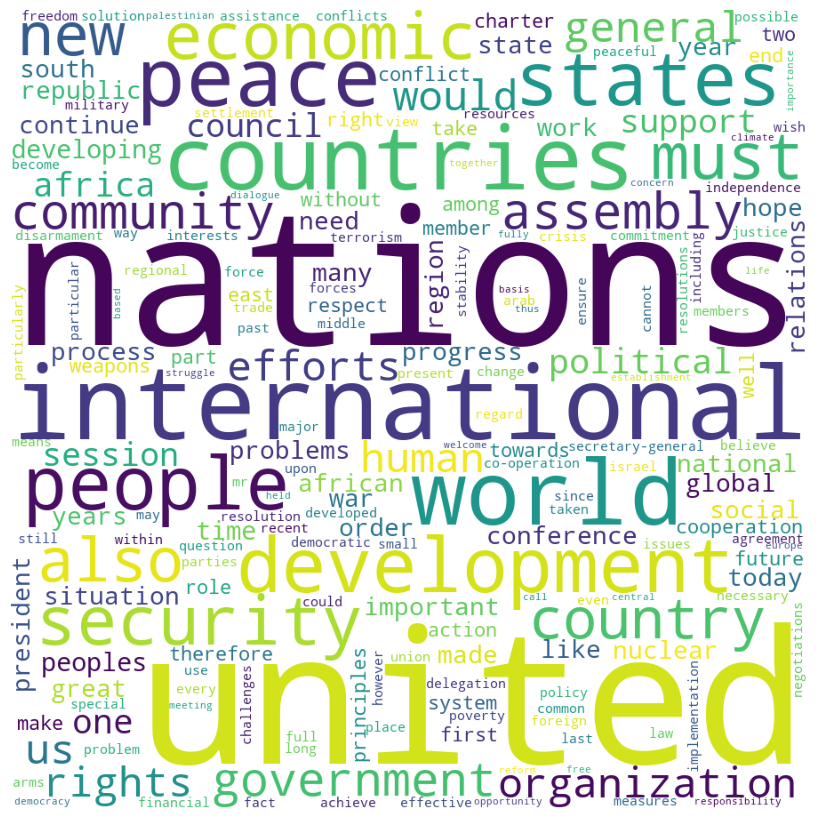

In [7]:
# Import the WordCloud class from the wordcloud module

from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Initialize a WordCloud object with specified parameters

wc = WordCloud(background_color='white', width = 900, height=900, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")

# Adjust layout to minimize overlaps

plt.tight_layout(pad = 0)
plt.show()

## NUMPY PACKAGE AND IDF COMPUTATION

In [8]:
# Import the numpy module and alias it as np

import numpy as np

# Define a function to compute the Inverse Document Frequency (IDF)

def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df

# Call the compute_idf function with the DataFrame df to compute IDF values
idf_df = compute_idf(df)

## CALCULATING FREQUENCY 

In [9]:
# Multiply the frequency of each token by its corresponding IDF value to compute TF-IDF

freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


## WORDCLOUD BASED ON TF-IDF SCORES

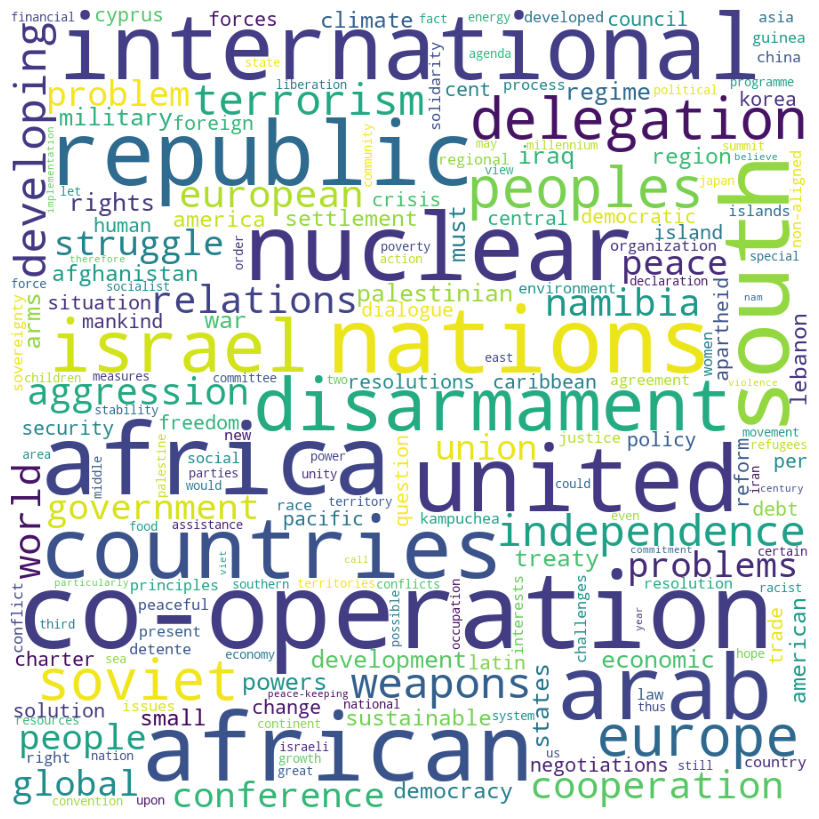

In [10]:
# Initialize a WordCloud object with specified parameters

wc = WordCloud(background_color='white', width = 900, height=900, margin=2)

# Generate the word cloud by fitting the TF-IDF scores from freq_df

wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)

# Turn off axis labels

plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## LOADING DATA FOR YEAR 1970

In [11]:
# Import the pandas library and alias it as pd

import pandas as pd
file = "un-general-debates-blueprint.csv"
df = pd.read_csv(file)

# Filter the DataFrame to include only records from the year 1970

df= df[df['year']==1970]
df.head(10)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


###

## IMPORTING NLTK AND DOWNLOADING STOPWORDS

In [12]:
# Import the nltk library

import nltk 
nltk.download('stopwords')

# Retrieve the set of English stopwords from NLTK's corpus

stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'which', 'weren', 'she', 'i', 'him', "hadn't", 'he', 'needn', 'down', 'they', "hasn't", "weren't", 'by', 'mustn', 'being', 'out', "didn't", 'theirs', 'until', 'to', 'same', 'hasn', 'his', 'itself', 'hers', "you've", 'd', 'shan', 'very', 'while', 'their', 'its', 'at', 'didn', 'such', 'them', 'ourselves', 'yours', 'did', 'here', 'does', "mightn't", "shan't", 'm', "she's", 'so', 'was', 'under', "you're", 'through', 'each', 'wasn', 'been', "doesn't", 'yourselves', 'once', "couldn't", 'only', 'now', "isn't", 'y', 'against', 't', 'this', 'had', 'own', 'ain', 'her', 'your', 'above', 'and', 'after', 're', 'has', 's', 'wouldn', 'ours', "won't", 'himself', 'than', 'these', "aren't", 'further', 'other', 'both', 'any', "should've", "shouldn't", 'why', 'am', 'me', 'my', 'up', 'having', 'a', 'all', 'with', 'in', 'most', "wasn't", 'there', 'then', 'whom', 'into', 'off', "wouldn't", 'the', 'doing', 'below', 'couldn', 'will', "haven't", 'be', 'over', 'those', 'themselves', 'for', 'because', 'from', 'a

[nltk_data] Downloading package stopwords to /Users/sid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## TEXT PREPROCESSING PIPELINE WITH TOKENIZATION AND STOPWORD REMOVAL

In [13]:
## Function to remove stopwords from tokens


import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Function to remove stopwords from tokens

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

## COMPUTING TOKEN FREQUENCIES

In [14]:
# Import the Counter class from the collections module

from collections import Counter
counter = Counter()

# Update the counter with tokens from each row in the 'tokens' column of the DataFrame

df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')

# Set the index name to 'token'

freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,1997
united,1996
international,1251
world,1093
peace,970
countries,908
states,896
organization,762
would,677


## WORDCLOUD BASED ON TOKEN FREQUENCIES

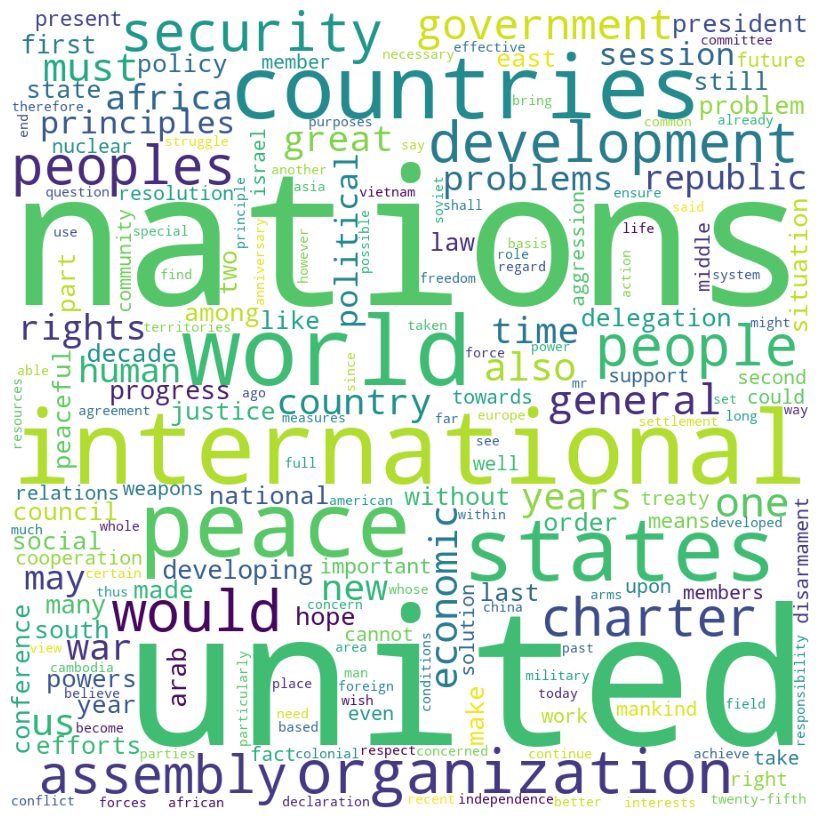

In [16]:
# Import the WordCloud class from the wordcloud module

from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 900, height=900, margin=2)

# Generate the word cloud by fitting the token frequencies from freq_df

wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## COMPUTE INVERSE DOCUMENT FREQUENCY FOR TOKENS

In [17]:
#Import the numpy module

import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

## COMPUTING TF-IDF 

In [18]:
# Compute TF-IDF values by multiplying token frequencies with corresponding IDF scores

freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,1997,199.7
united,1996,199.6
international,1251,125.1
world,1093,109.3
peace,970,97.0


## WORDCLOUD FOR TF-IDF SCORES

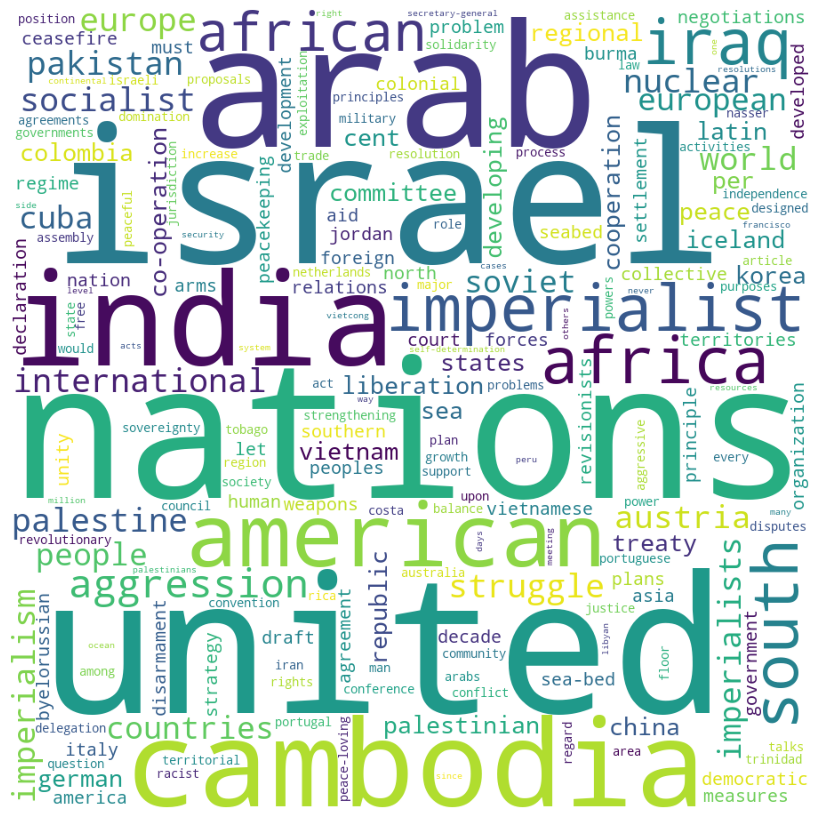

In [19]:
# Initialize a WordCloud object with specified parameters

wc = WordCloud(background_color='white', width = 900, height=900, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )

# Create a new figure for the plot with specified size and facecolor

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")

# Adjust layout to minimize overlaps

plt.tight_layout(pad = 0)
 
plt.show()

## COUNTING TOKENS AND KEYWORDS

In [20]:
# Add a new column to the DataFrame to count the number of tokens in each row

df['num_tokens'] = df['tokens'].map(len)

# Define a function to count occurrences of specified keywords in the tokens

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

## COUNTING KEYWORDS

In [21]:
#Counts occurrences of specified keywords in tokens, grouped by one or more columns in the DataFrame.

def count_keywords_by(df, by, keywords, column='tokens'):
    
    # Reset the index to ensure consecutive integers if the supplied DataFrame has gaps in the index
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

## VISUALIZE RELATIVE FREQUENCIES OVER YEAR

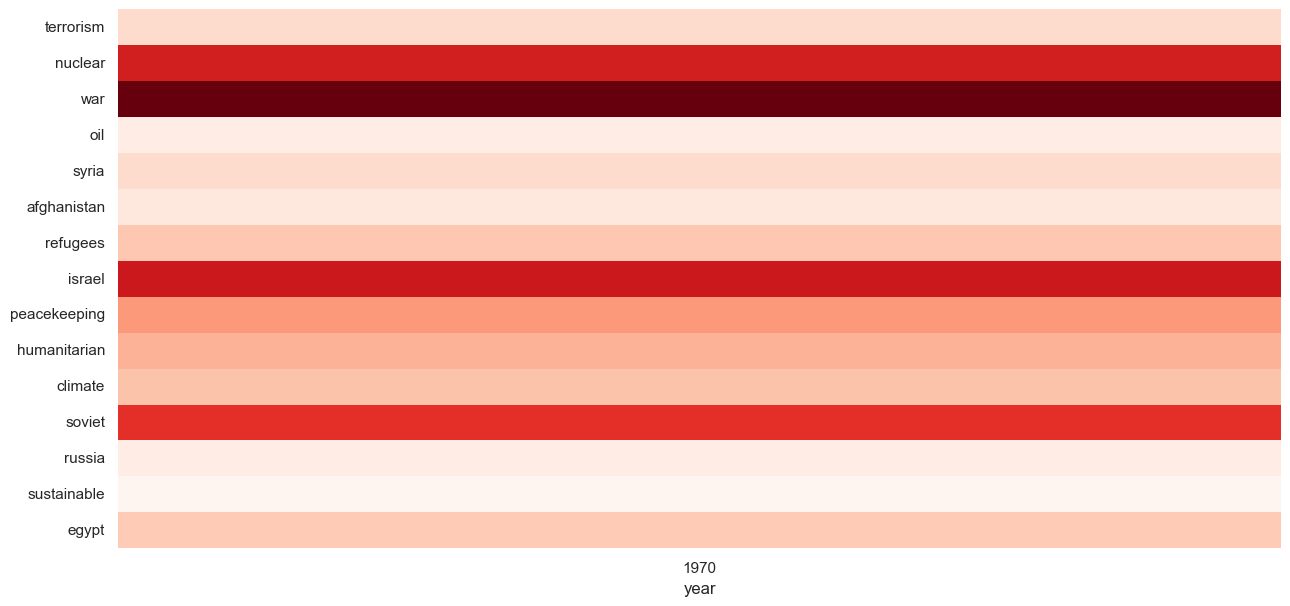

In [22]:
# Import the seaborn library and alias it as sns
import seaborn as sns

# Define the keywords of interest
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)